In [ ]:
import pandas as pd

df = pd.read_csv("../results_11a_50_200.csv")

# Quick sanity check
print(df.head())
print(df["alg"].value_counts())


                          instance  \
0  instance31_nreq50_nveh2_gamma50   
1  instance31_nreq50_nveh2_gamma50   
2  instance31_nreq50_nveh2_gamma50   
3  instance31_nreq50_nveh2_gamma50   
4  instance31_nreq50_nveh2_gamma50   

                                            filename   n  nK  gamma    C  \
0  /Users/nataliatylek/Heuristics_Programming_Pro...  50   2     50  100   
1  /Users/nataliatylek/Heuristics_Programming_Pro...  50   2     50  100   
2  /Users/nataliatylek/Heuristics_Programming_Pro...  50   2     50  100   
3  /Users/nataliatylek/Heuristics_Programming_Pro...  50   2     50  100   
4  /Users/nataliatylek/Heuristics_Programming_Pro...  50   2     50  100   

     rho      alg  alpha  seed  total_time  fairness          obj  iterations  \
0  25.94   nn_det    NaN     1      2956.0  0.548115  2967.721896        1.00   
1  25.94  nn_rand    0.3     1      3870.0  0.922717  3872.004715        1.00   
2  25.94    grasp    0.3     1      2597.0  0.999839  2597.004188      

In [3]:
summary_alg = (
    df.groupby("alg", as_index=False)
      .agg(
          mean_obj      = ("obj", "mean"),
          std_obj       = ("obj", "std"),
          mean_fairness = ("fairness", "mean"),
          std_fairness  = ("fairness", "std"),
          mean_runtime  = ("runtime", "mean"),
          std_runtime   = ("runtime", "std"),
      )
)

print(summary_alg)


       alg     mean_obj     std_obj  mean_fairness  std_fairness  \
0    grasp  2325.588924  203.312269       0.976538      0.031301   
1   nn_det  2577.991048  278.570230       0.658234      0.191584   
2  nn_rand  3530.665605  253.884561       0.967853      0.037928   

   mean_runtime  std_runtime  
0      0.226855     0.022645  
1      0.005903     0.035750  
2      0.003367     0.012938  


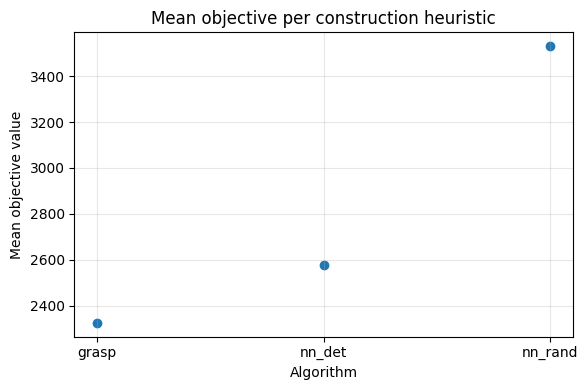

In [4]:
import matplotlib.pyplot as plt

# Mean obj per algorithm
mean_obj = df.groupby("alg")["obj"].mean()

plt.figure(figsize=(6,4))
plt.scatter(mean_obj.index, mean_obj.values)
plt.xlabel("Algorithm")
plt.ylabel("Mean objective value")
plt.title("Mean objective per construction heuristic")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


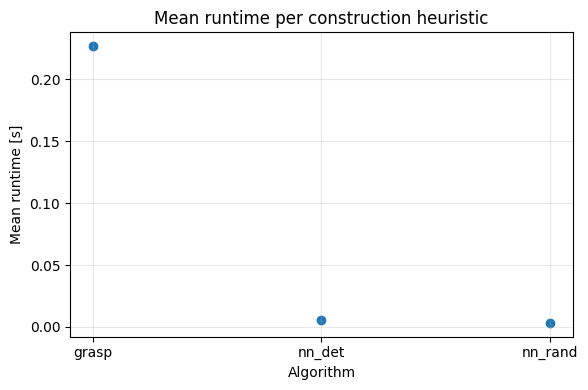

In [5]:
mean_rt = df.groupby("alg")["runtime"].mean()

plt.figure(figsize=(6,4))
plt.scatter(mean_rt.index, mean_rt.values)
plt.xlabel("Algorithm")
plt.ylabel("Mean runtime [s]")
plt.title("Mean runtime per construction heuristic")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [6]:
cols = ["instance", "alg", "alpha", "seed", "obj", "fairness", "runtime"]
df_table = df[cols]

latex = df_table.to_latex(
    index=False,
    float_format="%.3f",
    escape=False,
    column_format="llrrrrr"
)

print(latex)


\begin{tabular}{llrrrrr}
\toprule
instance & alg & alpha & seed & obj & fairness & runtime \\
\midrule
instance31_nreq50_nveh2_gamma50 & nn_det & NaN & 1 & 2967.722 & 0.548 & 0.254 \\
instance31_nreq50_nveh2_gamma50 & nn_rand & 0.300 & 1 & 3872.005 & 0.923 & 0.093 \\
instance31_nreq50_nveh2_gamma50 & grasp & 0.300 & 1 & 2597.004 & 1.000 & 0.245 \\
instance31_nreq50_nveh2_gamma50 & nn_det & NaN & 2 & 2967.722 & 0.548 & 0.001 \\
instance31_nreq50_nveh2_gamma50 & nn_rand & 0.300 & 2 & 3952.362 & 0.986 & 0.001 \\
instance31_nreq50_nveh2_gamma50 & grasp & 0.300 & 2 & 2765.393 & 0.985 & 0.275 \\
instance31_nreq50_nveh2_gamma50 & nn_det & NaN & 3 & 2967.722 & 0.548 & 0.001 \\
instance31_nreq50_nveh2_gamma50 & nn_rand & 0.300 & 3 & 4017.041 & 0.998 & 0.001 \\
instance31_nreq50_nveh2_gamma50 & grasp & 0.300 & 3 & 2536.624 & 0.976 & 0.259 \\
instance31_nreq50_nveh2_gamma50 & nn_det & NaN & 4 & 2967.722 & 0.548 & 0.001 \\
instance31_nreq50_nveh2_gamma50 & nn_rand & 0.300 & 4 & 4020.322 & 0.910 & 

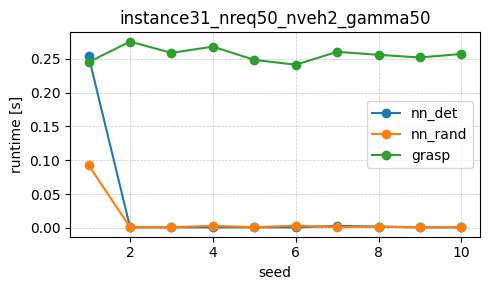

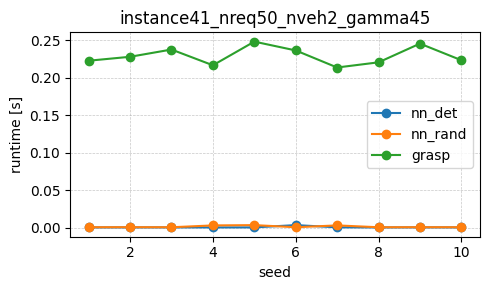

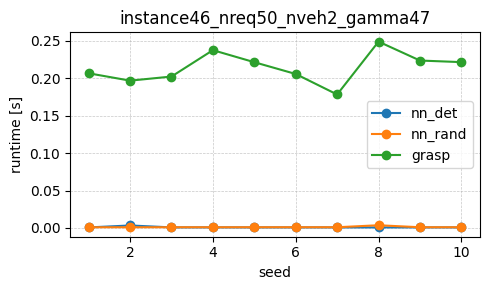

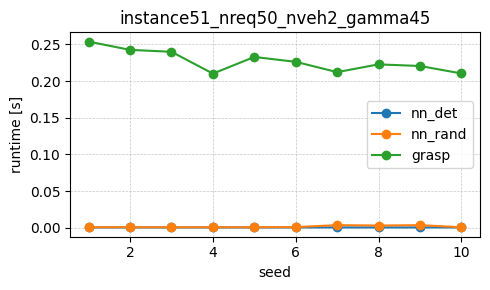

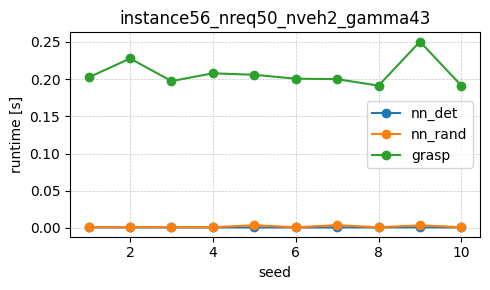

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your CSV (adjust filename if needed)
df = pd.read_csv("../results_11a.csv")

# (Optional) keep only these five instances, in a nice order
instances_order = [
    "instance31_nreq50_nveh2_gamma50",
    "instance41_nreq50_nveh2_gamma45",
    "instance46_nreq50_nveh2_gamma47",
    "instance51_nreq50_nveh2_gamma45",
    "instance56_nreq50_nveh2_gamma43",
]
df = df[df["instance"].isin(instances_order)]

alg_order = ["nn_det", "nn_rand", "grasp"]

# 2. One plot per instance
for inst in instances_order:
    tmp = df[df["instance"] == inst]

    if tmp.empty:
        continue  # in case some instance isn’t in the file

    fig, ax = plt.subplots(figsize=(5, 3))

    for alg in alg_order:
        sub = tmp[tmp["alg"] == alg].sort_values("seed")
        if sub.empty:
            continue
        ax.plot(
            sub["seed"],
            sub["runtime"],
            marker="o",
            linestyle="-",
            label=alg,
        )

    ax.set_title(inst)
    ax.set_xlabel("seed")
    ax.set_ylabel("runtime [s]")
    ax.legend()
    ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()
